In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style("whitegrid")
palette = sns.color_palette()

In [3]:
sns.set_palette(palette)
palette

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

# Preparing the Dataframe

In [4]:
if 'plots' in os.getcwd():
    print("cwd is correct")
else:
    MYDIR = ("plots")
    os.chdir("../")
    CHECK_FOLDER = os.path.isdir(MYDIR)
    ## If folder doesn't exist, then create it.
    if not CHECK_FOLDER:
        os.makedirs(MYDIR)
        print("created folder : ", MYDIR)

    else:
        print(MYDIR, "folder already exists.")

os.chdir("plots/")
print("current directroy is: ", os.getcwd())

created folder :  plots
current directroy is:  /media/hmk/Galeri/Files/Projects/Multi_Agents_Area_Exploration/analysing_data/plots


In [5]:
# check the data for NaN values or other errors
df_all = pd.read_csv(f"../../data_save/all_data.csv")

In [6]:
pd.options.display.max_columns = 500 # this will set limit of columns to 500

In [7]:
df_all.shape

(25342111, 40)

In [8]:
# drop all columns with NaN values
df_all = df_all.dropna(axis=1)
df_all.shape

(25342111, 28)

In [9]:
df_all['method'] = df_all['method'].astype('category')
df_all['method'] = df_all['method'].apply(lambda x: x.replace('_', ' ').title())

# remove all _ from the column names
df_all.columns = df_all.columns.str.replace('_', ' ')
# make all the columns tital like
df_all.columns = df_all.columns.str.title()

In [10]:
len(list(df_all['Experiment Id'].unique()))

202500

In [11]:
df_all.columns

Index(['Unnamed: 0', 'Area Percent', 'Update Time', 'Delta Time',
       'Plan Length', 'Replan Count', 'Logging Time', 'Frame Count',
       'Known Area', 'Total Distance Travelled', 'Success', 'Seed', 'Draw Sim',
       'Log Plots', 'Use Threads', 'N Bots', 'Grid Thickness', 'Cols', 'Rows',
       'Room Area', 'Min Room Size', 'Max Room Size', 'Wall Ratio', 'Method',
       'Start Scenario', 'Goal Scenario', 'Experiment Id', 'Loss Type'],
      dtype='object')

In [12]:
df_all['Method'].unique()

['Unknown Random', 'Voronoi Frontier Help Closest', 'Unknown Closest', 'Decay Epsilon Greedy Unknown', 'Frontier Closest', 'Decision Frontier Closest', 'Frontier Random', 'Voronoi Frontier Help Random', 'Decay Epsilon Greedy Frontier', 'Gametheory']
Categories (10, object): ['Decay Epsilon Greedy Frontier', 'Decay Epsilon Greedy Unknown', 'Decision Frontier Closest', 'Frontier Closest', ..., 'Unknown Closest', 'Unknown Random', 'Voronoi Frontier Help Closest', 'Voronoi Frontier Help Random']

In [13]:
df_all['Method'] = df_all['Method'].replace(['Gametheory'], 'Anti Majority')

# Set up all the DataFrames

In [14]:
df_all['M'] = df_all['Method'].apply(lambda x: ''.join([str(i[0]) for i in x.split(' ')]))
df_end = df_all.drop_duplicates(subset=['Experiment Id'], keep='last').sort_values(by=['Experiment Id'])

In [15]:
df_agent = df_all[df_all['Loss Type'] == 'Agent']
df_agent_end = df_agent.drop_duplicates(subset=['Experiment Id'], keep='last').sort_values(by=['Experiment Id'])

In [16]:
df_all_success = df_all[df_all['Success'] == True]
df_end_success = df_end[df_end['Success'] == True]
df_all_success_four = df_all_success[df_all_success['N Bots'] == 4]
df_end_success_four = df_end_success[df_end_success['N Bots'] == 4]
df_end_success_twelve = df_end_success[df_end_success['N Bots'] == 12]

# Worst Case Scenario

In [17]:
# wost_case = df_all_success_four.groupby(['M']).max()[['Frame Count', 'Delta Time']].sort_values(by='Frame Count')
wost_case = df_end_success_four.groupby(['M'])[['Frame Count', 'Replan Count','Delta Time', 'Update Time']].describe().round(2)

# rename Delta Time to Compute Time
wost_case = wost_case.rename(columns={'Delta Time': 'Compute Time'})
wost_case = wost_case.rename(columns={'Frame Count': 'Time (Seconds)'})




# print second level column names
# {'Frame Count',  'mean', 'std', 'min','max'}
wost_case= wost_case.drop(['count', '25%', '50%', '75%'], axis=1, level=1,)

with open(f"worst_case_four.txt", 'w') as f:
    f.write(wost_case.to_latex())
    
wost_case

/tmp/ipykernel_5172/1722039069.py:16: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  f.write(wost_case.to_latex())


Time (Seconds)                       Replan Count                      \
               mean    std    min     max         mean    std   min    max   
M                                                                            
DEGF         202.55  77.70   63.0   592.0       167.43  50.36  67.0  478.0   
DEGU         160.22  56.14   49.0   543.0       148.42  35.75  58.0  337.0   
DFC          140.62  58.88   47.0  1003.0       194.66  53.03  60.0  523.0   
FC           178.33  89.05   36.0   678.0       195.41  62.49  79.0  591.0   
FR           350.51  99.63  114.0   932.0       145.34  43.56  58.0  395.0   
AM           219.89  72.60   75.0   745.0       152.89  43.83  51.0  392.0   
UC           138.50  55.87   45.0   555.0       211.18  55.03  71.0  562.0   
UR           251.16  79.79   91.0   769.0       103.52  25.59  38.0  203.0   
VFHC         130.77  48.23   44.0   567.0       177.91  36.54  82.0  395.0   
VFHR         177.77  70.28   48.0   685.0        94.55  22.58  38.0  186.0   

     Compute Time                    Update Time                    
             mean   std   min    max        mean   std   min   max  
M                                                                   
DEGF        11.41  3.36  3.74  33.34        0.36  0.22  0.00  1.39  
DEGU        12.01  3.27  4.06  28.85        0.38  0.23  0.00  1.39  
DFC         12.75  3.75  4.90  40.83        0.16  0.10  0.01  0.88  
FC           9.69  3.69  2.16  26.30        0.34  0.22  0.00  1.28  
FR          19.56  5.49  5.20  46.72        0.39  0.23  0.01  1.19  
AM          12.26  3.10  3.70  27.57        0.38  0.23  0.00  1.24  
UC          12.91  4.17  3.76  44.99        0.37  0.23  0.00  1.40  
UR          15.28  3.56  6.31  33.26        0.39  0.23  0.01  1.55  
VFHC        11.92  2.91  4.68  28.57        0.32  0.23  0.00  1.24  
VFHR        10.98  2.73  3.88  24.89        0.36  0.23  0.00  1.13

In [18]:
# wost_case = df_all_success_four.groupby(['M']).max()[['Frame Count', 'Delta Time']].sort_values(by='Frame Count')
wost_case = df_end_success_twelve.groupby(['M'])[['Frame Count', 'Replan Count','Delta Time', 'Update Time']].describe().round(2)

# rename Delta Time to Compute Time
wost_case = wost_case.rename(columns={'Delta Time': 'Compute Time'})
wost_case = wost_case.rename(columns={'Frame Count': 'Time (Seconds)'})




# print second level column names
# {'Frame Count',  'mean', 'std', 'min','max'}
wost_case= wost_case.drop(['count', '25%', '50%', '75%'], axis=1, level=1,)

with open(f"worst_case_twelve.txt", 'w') as f:
    f.write(wost_case.to_latex())
    
wost_case

/tmp/ipykernel_5172/2032224686.py:16: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  f.write(wost_case.to_latex())


Time (Seconds)                    Replan Count                        \
               mean    std  min    max         mean     std   min     max   
M                                                                           
DEGF          78.99  51.60  6.0  473.0       306.05  154.62  62.0  1101.0   
DEGU          60.92  36.76  6.0  289.0       243.04   93.18  57.0   837.0   
DFC           62.27  35.52  4.0  302.0       496.47  240.52  71.0  2740.0   
FC            77.16  55.56  6.0  526.0       328.95  177.41  62.0  1216.0   
FR           117.25  71.18  5.0  763.0       265.33  133.32  56.0  1005.0   
AM            85.77  50.97  6.0  603.0       282.24  140.34  51.0  1191.0   
UC            57.28  36.14  6.0  344.0       311.59  154.17  57.0  1460.0   
UR            90.77  53.83  5.0  980.0       184.46   63.30  44.0   471.0   
VFHC          52.46  27.45  5.0  263.0       285.26  121.92  61.0   921.0   
VFHR          60.10  33.12  6.0  503.0       180.38   55.84  49.0   443.0   

     Compute Time                     Update Time                    
             mean    std   min    max        mean   std   min   max  
M                                                                    
DEGF        15.97   8.65  2.28  58.00        0.94  0.71  0.00  4.11  
DEGU        16.10   7.76  2.69  55.44        1.03  0.74  0.01  3.87  
DFC         20.74  12.09  2.32  97.03        0.30  0.17  0.03  1.52  
FC          15.19   8.64  2.12  69.70        0.92  0.72  0.00  3.90  
FR          21.25  10.84  2.18  85.20        0.95  0.67  0.00  3.39  
AM          16.64   8.07  2.56  55.85        0.94  0.68  0.01  3.92  
UC          17.79   9.77  2.77  73.73        1.03  0.74  0.00  4.35  
UR          18.69   8.03  2.87  51.06        0.98  0.68  0.00  3.18  
VFHC        15.21   6.78  2.63  54.52        0.87  0.66  0.01  3.28  
VFHR        13.97   4.89  2.81  39.50        0.92  0.63  0.00  3.15

# Quality Metric Table

In [19]:
# quality_metric = df_agent_end.groupby(['M']).mean()
# quality_metric['Quality'] = quality_metric['Known Area'] / quality_metric['Total Distance Travelled']
# # show quality and method
# quality_metric = quality_metric.reset_index()[['M','Quality','Known Area','Total Distance Travelled']]
# # method_group[['M','Quality']]
# quality_metric = quality_metric.sort_values(by='Quality', ascending=False)
# quality_metric.reset_index()

# with open(f"success_metric.tex", 'w') as f:
#     # f.write(df_end.groupby(['Loss Type', 'Method','Success']).count()['Experiment Id'].to_latex())
#     # rotate the table 90 degrees so the index is now the columns
#     f.write(quality_metric.to_latex())
# quality_metric

# Failed Experiment Check

In [20]:
# Total success count
print('Success Count: ', df_end['Success'].value_counts()[True])
# Total fail count
print('Fail Countsss: ', df_end['Success'].value_counts()[False])
# What is the overall success rate
print("Success rate is: ", df_end['Success'].value_counts()[True]/df_end['Success'].value_counts().sum())
df_end['Success Rate'] = df_end['Success'].value_counts()[True]/df_end['Success'].value_counts().sum()
total_success = df_end['Success'].value_counts()[True]
total_fail = df_end['Success'].value_counts()[False]
total_experiments = total_success + total_fail
print("Total number of experiments: ", total_experiments, "\n\n")


print(df_end[df_end['Success'] == False]['Loss Type'].value_counts())
print(df_end[df_end['Success'] == True]['Loss Type'].value_counts())
# print(df_end[df_end['Success'] == False]['Method'].value_counts())

Success Count:  173982
Fail Countsss:  28518
Success rate is:  0.8591703703703704
Total number of experiments:  202500 


Unrecoverable    28493
Disrepair           25
Name: Loss Type, dtype: int64
Agent            67500
Disrepair        67475
Unrecoverable    39007
Name: Loss Type, dtype: int64


In [21]:
df_loss_unsuccessful = df_end[df_end['Success'] == False]

# df_loss_unsuccessful_disrepair = df_loss_unsuccessful[df_loss_unsuccessful['Loss Type'] == 'Disrepair']
# df_loss_unsuccessful_disrepair['N Bots'].value_counts()
# df_loss_unsuccessful_disrepair = df_loss_unsuccessful[df_loss_unsuccessful['Loss Type'] == 'Unrecoverable']
# df_loss_unsuccessful_disrepair['N Bots'].value_counts()

df_loss_unsuccessful['N Bots'].value_counts()
# sns.barplot(y="M", x="Success Ratio", hue="Loss Type", data=method_group.reset_index())

4     16091
8      7667
12     4760
Name: N Bots, dtype: int64

In [22]:
# loss_group = df_loss_unsuccessful.groupby(['M', 'N Bots']).count()['Experiment Id'].unstack()
loss_group = df_loss_unsuccessful.groupby(['M', 'Loss Type']).count()['Experiment Id'].unstack()
loss_group
with open(f"method_vs_agents_size.tex", 'w') as f:
    f.write(loss_group.sort_values(by='Unrecoverable', ascending=True).to_latex())

/tmp/ipykernel_5172/2367961549.py:5: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  f.write(loss_group.sort_values(by='Unrecoverable', ascending=True).to_latex())


In [23]:
# df_end['Success Ratio'] 
loss_group2 = df_loss_unsuccessful.groupby(['Loss Type', 'N Bots']).count()['Experiment Id'].unstack()
# loss_group2['Total'] = loss_group2[4]+loss_group2[8] + loss_group2[12]

with open(f"loss_count_vs_agents_size.tex", 'w') as f:
    f.write(loss_group2.T.to_latex())

loss_group2.T

/tmp/ipykernel_5172/2036225057.py:6: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  f.write(loss_group2.T.to_latex())


Loss Type,Disrepair,Unrecoverable
N Bots,,
4,25.0,16066.0
8,NaN,7667.0
12,NaN,4760.0


In [24]:
df_loss_unsuccessful_unrecoverable = df_loss_unsuccessful[df_loss_unsuccessful['Loss Type'] == 'Unrecoverable']

/tmp/ipykernel_5172/3183332264.py:27: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(f"unsuccesssful_unrecoverable_analysis.png", bbox_inches='tight' ,dpi=300, figsize=(8, 6))


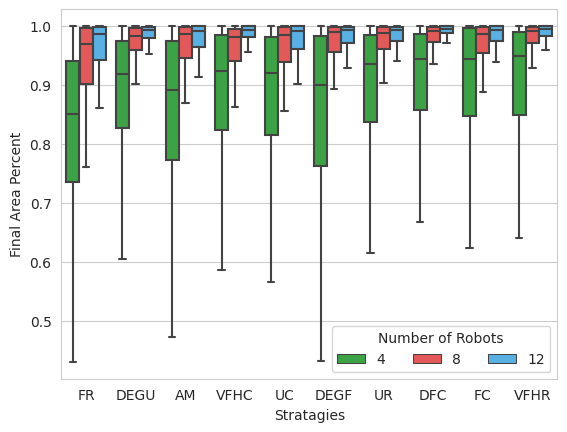

In [25]:
sns.set_style("whitegrid")
# df_end_success = df_end_success.replace(to_replace="Goal Scenario", value="Helloooo")
sorted_x_data = df_loss_unsuccessful_unrecoverable.groupby("M")["Area Percent"].median().sort_values().index
#  red, orange, cyan, purple
winter_palette = [ "#2bb338",  "#fa4141", "#41b6fa"]
grd = sns.boxplot(
    data=df_loss_unsuccessful_unrecoverable, 
    y="Area Percent", x="M", hue="N Bots", 
    showfliers=False,
    order=sorted_x_data,
    palette=winter_palette,
)
# grd.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Strategies')
# make the legonf in two columns
grd.legend(ncol=3, title='Number of Robots')

grd.set_xticklabels(grd.get_xticklabels())
# set x range 
# grd.set(ylim=(0, 310))
# set Y label
grd.set_ylabel("Final Area Percent")
grd.set_xlabel("Stratagies")
# grd.set(ylim=(0.9, 1))



plt.savefig(f"unsuccesssful_unrecoverable_analysis.png", bbox_inches='tight' ,dpi=300, figsize=(8, 6))

# Plots Start

In [26]:


with open(f"methods.tex", 'w') as f:
    # f.write(df_end_success[['Method', "M"]].drop_duplicates().reset_index(drop=True).to_latex())
    # sort alphabetically
    f.write(df_end_success[['Method', "M"]].drop_duplicates().sort_values(by='Method').reset_index(drop=True).to_latex())

/tmp/ipykernel_5172/484898920.py:4: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  f.write(df_end_success[['Method', "M"]].drop_duplicates().sort_values(by='Method').reset_index(drop=True).to_latex())


In [27]:
result = df_end_success.groupby(["M"])['Frame Count'].aggregate(np.mean).reset_index().sort_values('Frame Count')

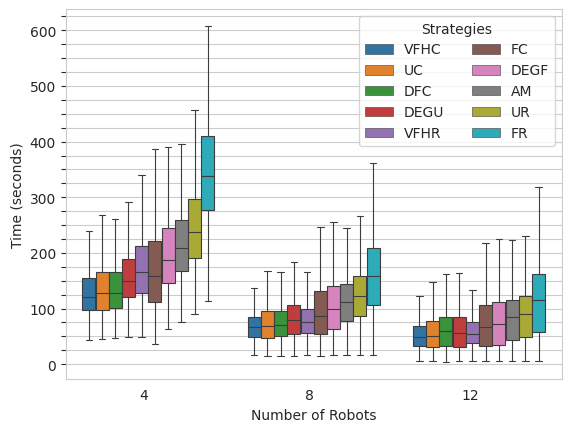

In [28]:
sns.set_style('whitegrid', rc={'ytick.left': True})



grd = sns.boxplot(
    data=df_end_success,
    x="N Bots",
    y="Frame Count",
    hue = "M",
    showfliers=False,
    # errorbar=("sd"),
    # errwidth=1.5,
    # capsize=.04,
    linewidth=0.8,
    # alpha=.8,
    hue_order=result['M']
)
# change the figure size of seaborn plot
# grd.figure.set_size_inches(6, 8)

# grd.legend(ncol=5)
# grd.legend(bbox_to_anchor=(1.02, 1), loc='upper center', borderaxespad=0, title='Strategies')
# place legend in the top of the plot, tight layout to make sure the legend is not cut off
grd.legend(ncol=2, title='Strategies', loc='upper right')

grd.set_ylabel("Time (seconds)")
grd.set_xlabel("Number of Robots")
grd.set_xticklabels(grd.get_xticklabels(), horizontalalignment='right')

plt.yticks(range(0, 626, 25))
for ind, label in enumerate(grd.get_yticklabels()):
    if ind % 4 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

plt.savefig(f"exploration_completion_time_barplot.png", bbox_inches='tight' ,dpi=300)

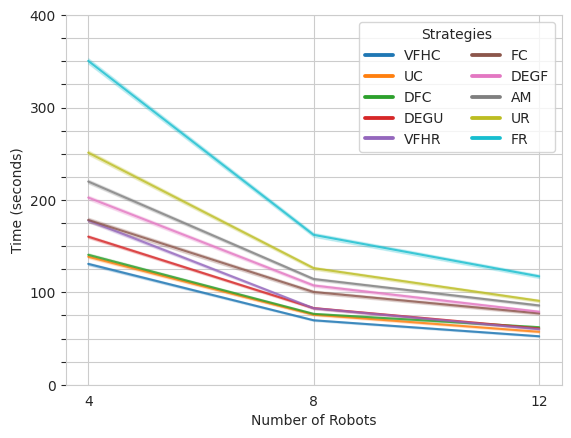

In [29]:
sns.set_style('whitegrid', rc={'ytick.left': True})

grd = sns.lineplot(
    data=df_end_success,
    x="N Bots",
    y="Frame Count",
    hue = "M",
    alpha=.8,
    hue_order=result['M']
)
# increase line legeond line width

legend = plt.legend(ncol=2, loc='upper right', title='Strategies', )
for line in legend.get_lines():
    line.set_linewidth(2.75)  # Set the desired line thickness

grd.set_ylabel("Time (seconds)")
grd.set_xlabel("Number of Robots")

plt.xticks(range(4, 16, 4))
plt.yticks(range(0, 401, 25))
for ind, label in enumerate(grd.get_yticklabels()):
    if ind % 4 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

plt.savefig(f"exploration_completion_time_lineplot.png", bbox_inches='tight' ,dpi=300)

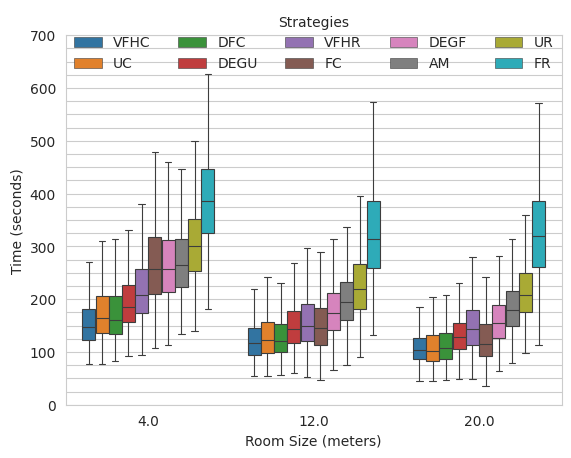

In [30]:
sns.set_style("whitegrid")
# df_end_success = df_end_success.replace(to_replace="Goal Scenario", value="Helloooo")

grd = sns.boxplot(
    # data=df_end_success, 
    data = df_end_success[df_end_success['N Bots'] == 4],
    y="Frame Count", x="Min Room Size", hue="M", 
    # showfliers=False,
    # errorbar=("sd"),
    # errwidth=1.5,
    # capsize=.04,
    # errcolor=".4",
    linewidth=0.8,
    showfliers=False,
    # edgecolor=".5",
    # alpha=.8,
    hue_order=result['M']
)
grd.legend(ncol=5, title='Strategies', loc='upper center', borderaxespad=0, frameon=False, bbox_to_anchor=(0.5, 1.07))



# set x range 
# grd.set(ylim=(0, 310))
# set Y label
grd.set_ylabel("Time (seconds)")
grd.set_xlabel("Room Size (meters)")
# grd.set(ylim=(0, 550))
# grd.set_xticklabels(rotation=30)
# plt.yticks(range(0, 310, 20))
plt.yticks(range(0, 701, 25))
for ind, label in enumerate(grd.get_yticklabels()):
    if ind % 4 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

# plt.grid(axis='y')
# plt.grid(color='gray', linestyle='dashed')
# need some cut before upload to overleaf
plt.savefig(f"room_density_vs_iteration_count_hue_strategies.png", bbox_inches='tight' ,dpi=300)

In [31]:
# fig, ax = plt.subplots(2,1, figsize=(6, 7),sharex=True)

# sns.set_style('whitegrid', rc={'ytick.left': True})


# grd = sns.boxplot(
#     data=df_end_success,
#     y="N Bots",
#     x="Frame Count",
#     hue = "M",
#     showfliers=False,
#     # errorbar=("sd"),
#     # errwidth=1.5,
#     # capsize=.04,
#     linewidth=0.8,
#     # alpha=.8,
#     hue_order=result['M'],
#     ax =ax[1] ,
#     orient='h'
# )
# grd.legend(ncol=2, title='Strategies', loc='lower right')



# grd2 = sns.boxplot(
#     # data=df_end_success, 
#     data = df_end_success[df_end_success['N Bots'] == 4],
#     x="Frame Count", y="Min Room Size", hue="M", 
#     # showfliers=False,
#     # errorbar=("sd"),
#     # errwidth=1.5,
#     # capsize=.04,
#     # errcolor=".4",
#     linewidth=0.8,
#     showfliers=False,
#     # edgecolor=".5",
#     # alpha=.8,
#     hue_order=result['M'],
#     ax =ax[0],
#     orient='h'

# )
# # grd2.set_xlabel("Time (seconds)")
# # ax[0].get_xaxis().set_visible(False)
# grd.set_ylabel("Number of Robots")


# # grd.set_xlabel("Time (seconds)")
# grd2.set_ylabel("Minimum Room Size (meters)")
# grd.set_xlabel("Time (seconds)")


# ax[0].get_legend().remove()
# # show all y ticks
# # ax[1].set_yticks(range(4, 12, 4), )

# plt.xticks(range(0, 701, 25), rotation=90)
# for ind, label in enumerate(grd.get_xticklabels()):
#     if ind % 4 == 0:  # every 10th label is kept
#         label.set_visible(True)
#     else:
#         label.set_visible(False)

# plt.tight_layout()

In [32]:
# fig, ax = plt.subplots(2, 1, figsize=(7, 5), sxticks(range(0, 701, 50), rotation=90)
# for ind, label in enumerate(grd.get_yticklabels()):
#     if ind % 2 == 0:  # every 10th label is kept
#         label.set_visible(True)
#     else:
#         label.set_visible(False)harex=True)

# sns.set_style('whitegrid', rc={'ytick.left': True})

# grd = sns.boxplot(
#     data=df_end_success,
#     x="N Bots",
#     y="Frame Count",
#     hue="M",
#     showfliers=False,
#     linewidth=0.8,
#     hue_order=result['M'],
#     ax=ax[1],
#     orient='h'
# )
# grd.legend(ncol=1, title='Strategies', loc='lower right')

# grd2 = sns.boxplot(
#     data=df_end_success[df_end_success['N Bots'] == 4],
#     x="Min Room Size",
#     y="Frame Count",
#     hue="M",
#     showfliers=False,
#     linewidth=0.8,
#     hue_order=result['M'],
#     ax=ax[0],
#     orient='h'
# )

# grd2.set_xlabel("Number of Robots")
# grd2.set_ylabel("Time (seconds)")
# grd.set_ylabel("Time (seconds)")
# grd.set_xlabel("Minimum Room Size (meters)")

# ax[0].get_legend().remove()

# plt.yticks(range(0, 701, 50), rotation=0)
# for ind, label in enumerate(grd.get_xticklabels()):
#     if ind % 2 == 0:
#         label.set_visible(True)
#     else:
#         label.set_visible(False)

# plt.tight_layout()


In [33]:
df_all_success

,Unnamed: 0,Area Percent,Update Time,Delta Time,Plan Length,Replan Count,Logging Time,Frame Count,Known Area,Total Distance Travelled,Success,Seed,Draw Sim,Log Plots,Use Threads,N Bots,Grid Thickness,Cols,Rows,Room Area,Min Room Size,Max Room Size,Wall Ratio,Method,Start Scenario,Goal Scenario,Experiment Id,Loss Type,M
0,0,0.1748,0.19,0.19,257,12,0.0,0,437,15.727922,True,66,False,True,False,12,10,50,50,2500,20.0,20.0,0.0968,Unknown Random,start-Top_Left_Start,goal-Center_Start,50990,Unrecoverable,UR
1,1,0.1880,0.19,0.38,245,12,0.0,1,470,30.627417,True,66,False,True,False,12,10,50,50,2500,20.0,20.0,0.0968,Unknown Random,start-Top_Left_Start,goal-Center_Start,50990,Unrecoverable,UR
2,2,0.1980,0.19,0.57,233,14,0.0,2,495,46.769553,True,66,False,True,False,12,10,50,50,2500,20.0,20.0,0.0968,Unknown Random,start-Top_Left_Start,goal-Center_Start,50990,Unrecoverable,UR
3,3,0.2096,0.21,0.79,222,19,0.0,3,524,62.911688,True,66,False,True,False,12,10,50,50,2500,20.0,20.0,0.0968,Unknown Random,start-Top_Left_Start,goal-Center_Start,50990,Unrecoverable,UR
4,4,0.2200,0.21,1.01,212,23,0.0,4,550,79.468037,True,66,False,True,False,12,10,50,50,2500,20.0,20.0,0.0968,Unknown Random,start-Top_Left_Start,goal-Center_Start,50990,Unrecoverable,UR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25342106,149,0.9992,0.07,14.83,287,238,0.0,149,2498,1407.520995,True,66,False,True,False,8,10,50,50,2500,4.0,20.0,0.2656,Anti Majority,start-Center_Start,goal-Rand_Start,85188,Agent,AM
25342107,150,0.9996,0.08,14.91,279,238,0.0,150,2499,1416.763635,True,66,False,True,False,8,10,50,50,2500,4.0,20.0,0.2656,Anti Majority,start-Center_Start,goal-Rand_Start,85188,Agent,AM
25342108,151,0.9996,1.00,15.91,273,248,0.0,151,2499,1426.006276,True,66,False,True,False,8,10,50,50,2500,4.0,20.0,0.2656,Anti Majority,start-Center_Start,goal-Rand_Start,85188,Agent,AM
25342109,152,0.9996,0.08,15.99,265,248,0.0,152,2499,1436.077344,True,66,False,True,False,8,10,50,50,2500,4.0,20.0,0.2656,Anti Majority,start-Center_Start,goal-Rand_Start,85188,Agent,AM


In [34]:
# grd = sns.lineplot(data=df_all_success_four, x = 'Frame Count',y = 'Replan Count', hue='M')
# grd.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Strategies')
# # plt.xticks(range(0, 1000, 100))
# # plt.ylim(0, 600)
# grd.set_ylabel("Replan Count")
# grd.set_xlabel("Time (seconds)")
# plt.savefig(f"time_vs_replan_count_hue_strategies_before_padding.png", bbox_inches='tight', dpi=300)

In [35]:
# grd = sns.lineplot(data=df_all_success_four, x = 'Frame Count',y = 'Replan Count', hue='Min Room Size')
# grd.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Room Density')
# # plt.xticks(range(0, 1000, 100))
# # plt.ylim(0, 400)
# grd.set_ylabel("Replan Count")
# grd.set_xlabel("Time (seconds)")
# plt.savefig(f"time_vs_replan_count_hue_density_before_padding.png", bbox_inches='tight' ,dpi=300)

# PADDING DATA AND PLOTTING 2 FIGURES WITH PAD

In [36]:
# for i,[method, group] in enumerate(df_all_success.groupby(['M'])):
#     print("i: ", i, "Method: ", method, "Group: ", group.shape)
#     group_counts = group.groupby('Experiment Id')['Replan Count'].apply(lambda x: x.iloc[-1])
#     unique =  set(group['Frame Count'].unique())
#     data2 = group.groupby("Experiment Id").agg({"Frame Count":lambda x: unique - set(x)}).explode("Frame Count").dropna().reset_index()

#     for j in group_counts.index:
#         data2.loc[data2['Experiment Id'] == j, "Replan Count"] = group_counts[j]
#     new_data = pd.concat([group, data2]).sort_values(["Experiment Id", "Frame Count"])
    
#     count_group = new_data.groupby(['Frame Count'])
#     x_data = count_group['Replan Count'].mean()
#     sns.lineplot(x_data, label=method)
#     # sns.set_ylabels("Replan Count")
# plt.xlabel("Time (seconds)")
# plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Strategies')    
# plt.savefig(f"time_vs_replan_count_hue_strategies_after_padding.png", bbox_inches='tight', dpi=300)

In [37]:
def plot_time_vs_replan_count(ax, data, key_str ='Replan Count', use_legend=False, check_back_idx =10, color_order=None):
    # for i, [method, group] in enumerate(data.groupby(['M'])):
    for i, method in enumerate(color_order):
        group = data[data['M'] == method]
        print("i: ", i, "Method: ", method, "Group: ", group.shape)
        group_counts = group.groupby('Experiment Id')[key_str].apply(lambda x: x.iloc[-1])
        unique = set(group['Frame Count'].unique())
        data2 = group.groupby("Experiment Id").agg({"Frame Count": lambda x: unique - set(x)}).explode("Frame Count").dropna().reset_index()

        for j in group_counts.index:
            data2.loc[data2['Experiment Id'] == j, key_str] = group_counts[j]
        new_data = pd.concat([group, data2]).sort_values(["Experiment Id", "Frame Count"])

        count_group = new_data.groupby(['Frame Count'])
        x_data = list(count_group[key_str].mean())
        sns.lineplot(x_data, label=method, ax=ax)

        # place a point at the point where the line converges to its steady state
        cur_color = sns.color_palette()[i]
        for j in range(0, len(x_data)):
            check_index = check_back_idx +j
            if check_index >= len(x_data):
                break
            deta_value = x_data[check_index] - x_data[j]
            if deta_value < 0.1:
                ax.plot(j, x_data[j], 'o', color=cur_color)
                print("Method: ", method, " Steady State: ", x_data[j], "Time: ", j)
                break



    
    if use_legend:
        ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Strategies')
    else:
        ax.get_legend().remove()


    ax.set_ylabel(key_str)
    ax.set_xlabel("Time (seconds)")
    ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Strategies')


i:  0 Method:  VFHC Group:  (728021, 29)
Method:  VFHC  Steady State:  177.5628959276018 Time:  262
i:  1 Method:  UC Group:  (774498, 29)
Method:  UC  Steady State:  210.68263688760806 Time:  284
i:  2 Method:  DFC Group:  (752722, 29)
Method:  DFC  Steady State:  194.1463781749765 Time:  320
i:  3 Method:  DEGU Group:  (848022, 29)
Method:  DEGU  Steady State:  148.0480988593156 Time:  301
i:  4 Method:  VFHR Group:  (917269, 29)
Method:  VFHR  Steady State:  94.12746053400896 Time:  320
i:  5 Method:  FC Group:  (957989, 29)
Method:  FC  Steady State:  194.60876076375888 Time:  397
i:  6 Method:  DEGF Group:  (1029940, 29)
Method:  DEGF  Steady State:  166.84901185770752 Time:  389
i:  7 Method:  AM Group:  (1079487, 29)
Method:  AM  Steady State:  152.49171270718233 Time:  384
i:  8 Method:  UR Group:  (1196013, 29)
Method:  UR  Steady State:  103.00253004427577 Time:  412
i:  9 Method:  FR Group:  (1614835, 29)
Method:  FR  Steady State:  144.72137570744448 Time:  547
i:  0 Method

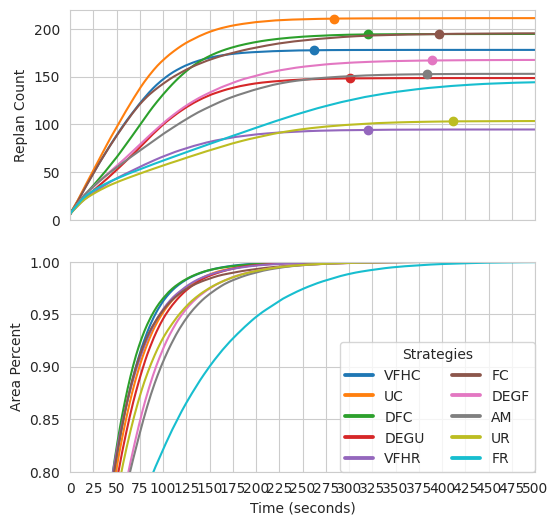

In [38]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(6, 6))

# Plot the first subplot for Replan Count
plot_time_vs_replan_count(ax[0], df_all_success_four, use_legend=False, color_order=result['M'])

# remove ax[1] legend
ax[0].get_legend().remove()


ax[0].set_ylabel("Replan Count")

# Plot the second subplot for Area Percent
plot_time_vs_replan_count(ax[1], df_all_success_four, key_str='Area Percent',color_order=result['M'])
ax[1].set_ylabel("Area Percent")
ax[1].set_xlabel("Time (seconds)")


legend =    ax[1].legend(ncol=2, loc='lower right', borderaxespad=0, title='Strategies', )

for line in legend.get_lines():
    line.set_linewidth(2.75)  # Set the desired line thickness



# set y range 
# ax[0].set(ylim=(0, 100))
ax[0].set(ylim=(0, 220))
ax[1].set(ylim=(0.80, 1))


ax[0].set(xlim=(0, 500))
ax[1].set(xlim=(0, 500))


plt.xticks(range(0, 501, 25))
for ind, label in enumerate(grd.get_xticklabels()):
    if ind % 4 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)


plt.savefig("time_vs_replan_count_area_percent_subplots.png", bbox_inches='tight', dpi=300)

In [39]:
# for i,[method, group] in enumerate(df_all_success.groupby(['Min Room Size'])):
#     print("i: ", i, "Method: ", method, "Group: ", group.shape)
#     group_counts = group.groupby('Experiment Id')['Replan Count'].apply(lambda x: x.iloc[-1])
#     unique =  set(group['Frame Count'].unique())
#     data2 = group.groupby("Experiment Id").agg({"Frame Count":lambda x: unique - set(x)}).explode("Frame Count").dropna().reset_index()

#     for j in group_counts.index:
#         data2.loc[data2['Experiment Id'] == j, "Replan Count"] = group_counts[j]
#     new_data = pd.concat([group, data2]).sort_values(["Experiment Id", "Frame Count"])
    
#     count_group = new_data.groupby(['Frame Count'])
#     x_data = count_group['Replan Count'].mean()
#     sns.lineplot(x_data, label=method)
#     # sns.set_ylabels("Replan Count")
# plt.xlabel("Time (seconds)")
# plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Strategies')    
# plt.savefig(f"time_vs_replan_count_hue_density_after_padding.png", bbox_inches='tight', dpi=300)

# PADDING FINISH

In [40]:
df_end_success['Goal Scenario'].unique()

array(['goal-Rand_Start', 'goal-Edge_Start', 'goal-Top_Left_Start',
       'goal-Center_Start', 'goal-Distributed_Start'], dtype=object)

In [50]:
df_end_success['Goal Scenario'] = df_end_success['Goal Scenario'].replace(['goal-Center_Start'], 'Center of Map')
df_end_success['Goal Scenario'] = df_end_success['Goal Scenario'].replace(['goal-Distributed_Start'], 'Equal Spread')
df_end_success['Goal Scenario'] = df_end_success['Goal Scenario'].replace(['goal-Edge_Start'], 'Edges of Map')
df_end_success['Goal Scenario'] = df_end_success['Goal Scenario'].replace(['goal-Rand_Start'], 'Random Location')
df_end_success['Goal Scenario'] = df_end_success['Goal Scenario'].replace(['goal-Top_Left_Start'], 'Top Left Corner')


/var/folders/js/bkw6w2895kn1mtkmw0kl_b240000gn/T/ipykernel_51118/3802547872.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_end_success['Goal Scenario'] = df_end_success['Goal Scenario'].replace(['goal-Center_Start'], 'Center of Map')
/var/folders/js/bkw6w2895kn1mtkmw0kl_b240000gn/T/ipykernel_51118/3802547872.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_end_success['Goal Scenario'] = df_end_success['Goal Scenario'].replace(['goal-Distributed_Start'], 'Equal Spread')
/var/folders/js/bkw6w289

In [42]:
df_end_success['Goal Scenario'].unique()

array(['Random Location', 'Edges of Map', 'Top Left Corner',
       'Center of Map', 'Equal Spread'], dtype=object)

In [43]:
palet2 = sns.color_palette("bright", 10)
paletinv = palet2.reverse()
paletinv


In [44]:
result22 = df_end_success.groupby(["Goal Scenario"])['Frame Count'].aggregate(np.mean).reset_index().sort_values('Frame Count')

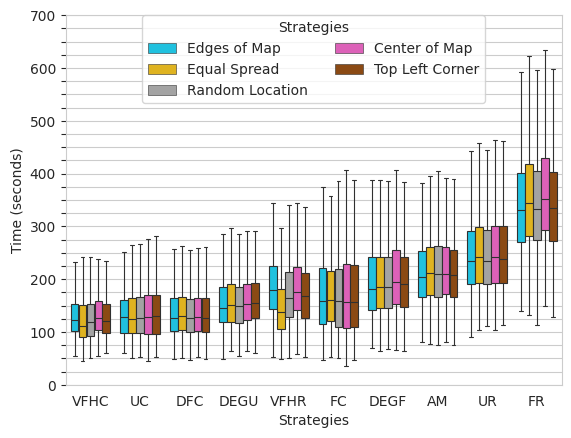

In [45]:
sns.set_style('whitegrid', rc={'ytick.left': True})

grd = sns.boxplot(
    data = df_end_success[df_end_success['N Bots'] == 4],
    y="Frame Count", x="M", hue="Goal Scenario", 
    palette = palet2,
    showfliers=False,
    # errorbar=("sd"),
    # errwidth=1.5,
    # capsize=.04,
    # errcolor=".4",
    linewidth=0.8,

    order=result['M'],
    hue_order = result22['Goal Scenario']


)
grd.legend(ncol=2, loc='upper center', title='Distribution Scenarios')
plt.legend(loc='upper left', title='Distribution Scenarios')
grd.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Distribution Scenarios')
grd.set_ylabel("Time (seconds)")
grd.set_xlabel("Strategies")
grd.set_xticklabels(grd.get_xticklabels()),

plt.legend(ncol=2 ,loc='upper center', borderaxespad=0, title='Strategies')
plt.yticks(range(0, 701, 25))
for ind, label in enumerate(grd.get_yticklabels()):
    if ind % 4 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

plt.savefig(f"distribution_vs_segmentation.png", bbox_inches='tight' ,dpi=300)

In [46]:
df_end_success[df_end_success['N Bots'] == 4].groupby(['M',"Goal Scenario"])['Frame Count'].describe()

count        mean         std    min     25%    50%  \
M    Goal Scenario                                                           
DEGF Center of Map    1005.0  212.053731   81.556149   66.0  153.00  195.0   
     Edges of Map     1008.0  196.277778   72.059587   69.0  142.00  181.0   
     Equal Spread     1017.0  199.213373   76.814870   63.0  145.00  185.0   
     Random Location  1014.0  200.818540   78.487633   67.0  145.00  185.0   
     Top Left Corner  1016.0  204.417323   78.504865   63.0  147.00  191.0   
DEGU Center of Map    1038.0  161.521195   55.829305   63.0  122.25  152.0   
     Edges of Map     1051.0  156.564225   54.777997   49.0  118.00  146.0   
     Equal Spread     1049.0  160.977121   56.697549   63.0  119.00  151.0   
     Random Location  1066.0  158.421201   58.577823   55.0  117.00  149.0   
     Top Left Corner  1056.0  163.647727   54.500776   61.0  126.00  154.0   
DFC  Center of Map    1047.0  140.043935   56.742432   53.0  101.00  128.0   
     Edges of Map     1057.0  141.372753   64.789425   49.0  101.00  127.0   
     Equal Spread     1056.0  142.842803   57.063463   50.0  103.00  131.0   
     Random Location  1072.0  139.225746   56.748017   47.0  100.00  127.0   
     Top Left Corner  1083.0  139.665743   58.705388   49.0  100.00  127.0   
FC   Center of Map    1073.0  177.829450   92.972471   36.0  108.00  156.0   
     Edges of Map     1060.0  177.881132   84.456262   46.0  115.00  158.0   
     Equal Spread     1062.0  178.213748   82.021367   53.0  121.00  160.0   
     Random Location  1069.0  175.884939   86.764506   51.0  109.00  159.0   
     Top Left Corner  1078.0  181.816327   97.979019   47.0  109.25  157.0   
FR   Center of Map     918.0  364.681917   99.619993  150.0  292.25  352.0   
     Edges of Map      922.0  342.175705  101.329488  139.0  270.00  331.0   
     Equal Spread      917.0  354.588877  102.927435  132.0  281.00  344.0   
     Random Location   916.0  344.861354   93.714083  114.0  274.00  333.0   
     Top Left Corner   921.0  346.282302   98.797347  129.0  273.00  334.0   
AM   Center of Map     979.0  220.880490   70.162454   81.0  172.00  210.0   
     Edges of Map      966.0  217.895445   73.721198   81.0  166.00  204.5   
     Equal Spread      981.0  221.642202   72.740757   78.0  170.00  211.0   
     Random Location   986.0  221.648073   73.797713   75.0  167.00  209.0   
     Top Left Corner   975.0  217.328205   72.548072   76.0  166.00  207.0   
UC   Center of Map    1103.0  141.216682   59.253165   45.0   96.50  129.0   
     Edges of Map     1111.0  136.081908   50.589761   60.0   98.00  129.0   
     Equal Spread     1113.0  137.428571   53.552961   50.0   98.00  125.0   
     Random Location  1115.0  137.311211   56.579991   53.0   98.00  127.0   
     Top Left Corner  1110.0  140.483784   58.823767   53.0   96.00  129.5   
UR   Center of Map     939.0  255.208733   82.611965  103.0  192.50  242.0   
     Edges of Map      949.0  247.716544   77.667084   91.0  190.00  235.0   
     Equal Spread      945.0  252.660317   80.786782  103.0  192.00  241.0   
     Random Location   961.0  248.005203   78.225216  111.0  191.00  234.0   
     Top Left Corner   949.0  252.317176   79.506704  113.0  192.00  238.0   
VFHC Center of Map    1094.0  136.363803   45.636208   54.0  103.00  127.0   
     Edges of Map     1094.0  132.983547   45.551251   55.0  101.00  123.0   
     Equal Spread     1114.0  124.684022   50.356490   44.0   90.00  112.0   
     Random Location  1114.0  128.461400   50.498920   50.0   92.00  118.0   
     Top Left Corner  1109.0  131.493237   48.036832   61.0   98.00  120.0   
VFHR Center of Map    1005.0  188.626866   66.250829   59.0  142.00  176.0   
     Edges of Map     1015.0  191.526108   69.282595   53.0  142.50  180.0   
     Equal Spread     1062.0  151.704331   66.909628   48.0  105.00  138.0   
     Random Location  1031.0  179.697381   72.611278   51.0  128.50  165.0   
     Top Left Corner  1018.0  178.576621   69

In [54]:

VFHC_Center_Start =df_end_success[df_end_success['N Bots'] == 4].groupby(['M',"Goal Scenario"]).get_group(('VFHC', 'Center of Map'))['Frame Count']
VFHC_Distributed_Start =df_end_success[df_end_success['N Bots'] == 4].groupby(['M',"Goal Scenario"]).get_group(('VFHC', 'Equal Spread'))['Frame Count']
VFHC_Edge_Start =df_end_success[df_end_success['N Bots'] == 4].groupby(['M',"Goal Scenario"]).get_group(('VFHC', 'Edges of Map'))['Frame Count']
VFHC_Rand_Start =df_end_success[df_end_success['N Bots'] == 4].groupby(['M',"Goal Scenario"]).get_group(('VFHC', 'Top Left Corner'))['Frame Count']

data_check = {"VFHC_Center_Start":VFHC_Center_Start, 
              "VFHC_Distributed_Start":VFHC_Distributed_Start, 
              "VFHC_Edge_Start":VFHC_Edge_Start, 
              "VFHC_Rand_Start":VFHC_Rand_Start}

# Get the T test results
import scipy.stats as stats
import itertools
for i, [dist1, dist2] in enumerate(itertools.combinations(data_check, 2)):
    print("i: ", i, "dist1: ", dist1, ", dist2: ", dist2)
    print(stats.ttest_ind(data_check[dist1], data_check[dist2], equal_var = False))



i:  0 dist1:  VFHC_Center_Start , dist2:  VFHC_Distributed_Start
Ttest_indResult(statistic=5.7127713937617335, pvalue=1.262763509390782e-08)
i:  1 dist1:  VFHC_Center_Start , dist2:  VFHC_Edge_Start
Ttest_indResult(statistic=1.7339554692753503, pvalue=0.08306696891671879)
i:  2 dist1:  VFHC_Center_Start , dist2:  VFHC_Rand_Start
Ttest_indResult(statistic=2.4400297587206965, pvalue=0.014764587379358356)
i:  3 dist1:  VFHC_Distributed_Start , dist2:  VFHC_Edge_Start
Ttest_indResult(statistic=-4.062876022833008, pvalue=5.017863939433806e-05)
i:  4 dist1:  VFHC_Distributed_Start , dist2:  VFHC_Rand_Start
Ttest_indResult(statistic=-3.2621389688019486, pvalue=0.001122528996907382)
i:  5 dist1:  VFHC_Edge_Start , dist2:  VFHC_Rand_Start
Ttest_indResult(statistic=0.7472715916400029, pvalue=0.45497958355534385)


In [72]:

Center_Start =df_end_success[df_end_success['N Bots'] == 4].groupby(["Goal Scenario"]).get_group(('Center of Map'))
Distributed_Start =df_end_success[df_end_success['N Bots'] == 4].groupby(["Goal Scenario"]).get_group(( 'Equal Spread'))
Edge_Start =df_end_success[df_end_success['N Bots'] == 4].groupby(["Goal Scenario"]).get_group(( 'Edges of Map'))
Rand_Start =df_end_success[df_end_success['N Bots'] == 4].groupby(["Goal Scenario"]).get_group(('Top Left Corner'))

# remove all data with VFHC
def remove_vfhc(data):
    return data[data['M'] != 'VFHC']

Center_Start = remove_vfhc(Center_Start)["Frame Count"]
Distributed_Start = remove_vfhc(Distributed_Start)["Frame Count"]
Edge_Start = remove_vfhc(Edge_Start)["Frame Count"]
Rand_Start = remove_vfhc(Rand_Start)["Frame Count"]

data_check = {"Center_Start":Center_Start, 
                "Distributed_Start":Distributed_Start,
                "Edge_Start":Edge_Start,
                "Rand_Start":Rand_Start}

# Get the T test results
import scipy.stats as stats
import itertools
for i, [dist1, dist2] in enumerate(itertools.combinations(data_check, 2)):
    print("i: ", i, "dist1: ", dist1, ", dist2: ", dist2)
    print(stats.ttest_ind(data_check[dist1], data_check[dist2], equal_var = False))

i:  0 dist1:  Center_Start , dist2:  Distributed_Start
Ttest_indResult(statistic=4.999782723318098, pvalue=5.792584799171277e-07)
i:  1 dist1:  Center_Start , dist2:  Edge_Start
Ttest_indResult(statistic=4.117200865385759, pvalue=3.851947237650284e-05)
i:  2 dist1:  Center_Start , dist2:  Rand_Start
Ttest_indResult(statistic=2.90969677869054, pvalue=0.0036221566503685087)
i:  3 dist1:  Distributed_Start , dist2:  Edge_Start
Ttest_indResult(statistic=-0.9646699526511863, pvalue=0.33472287780865784)
i:  4 dist1:  Distributed_Start , dist2:  Rand_Start
Ttest_indResult(statistic=-2.1380508680361885, pvalue=0.032525746071120305)
i:  5 dist1:  Edge_Start , dist2:  Rand_Start
Ttest_indResult(statistic=-1.1999794352905129, pvalue=0.23016282987830164)


In [74]:
# compare all the distributions
data_check = {"VFHC_Center_Start":VFHC_Center_Start,
                "VFHC_Distributed_Start":VFHC_Distributed_Start,
                "VFHC_Edge_Start":VFHC_Edge_Start,
                "VFHC_Rand_Start":VFHC_Rand_Start,
                "Center_Start":Center_Start,
                "Distributed_Start":Distributed_Start,
                "Edge_Start":Edge_Start,
                "Rand_Start":Rand_Start}

# Get the T test results
import scipy.stats as stats
import itertools
for i, [dist1, dist2] in enumerate(itertools.combinations(data_check, 2)):
    statistic, pvalue = stats.ttest_ind(data_check[dist1], data_check[dist2], equal_var = False)
    if pvalue < 0.05:
        print("i: ", i, "dist1: ", dist1, ", dist2: ", dist2)
        print("statistic: ", statistic,"pvalue: ", pvalue, )

i:  0 dist1:  VFHC_Center_Start , dist2:  VFHC_Distributed_Start
statistic:  5.7127713937617335 pvalue:  1.262763509390782e-08
i:  2 dist1:  VFHC_Center_Start , dist2:  VFHC_Rand_Start
statistic:  2.4400297587206965 pvalue:  0.014764587379358356
i:  3 dist1:  VFHC_Center_Start , dist2:  Center_Start
statistic:  -38.96070329493452 pvalue:  1.8080477022084273e-261
i:  4 dist1:  VFHC_Center_Start , dist2:  Distributed_Start
statistic:  -35.10567162654531 pvalue:  1.0928306598075794e-219
i:  5 dist1:  VFHC_Center_Start , dist2:  Edge_Start
statistic:  -36.25027503284352 pvalue:  6.554280317978699e-230
i:  6 dist1:  VFHC_Center_Start , dist2:  Rand_Start
statistic:  -36.98162933929769 pvalue:  1.4578617662925455e-238
i:  7 dist1:  VFHC_Distributed_Start , dist2:  VFHC_Edge_Start
statistic:  -4.062876022833008 pvalue:  5.017863939433806e-05
i:  8 dist1:  VFHC_Distributed_Start , dist2:  VFHC_Rand_Start
statistic:  -3.2621389688019486 pvalue:  0.001122528996907382
i:  9 dist1:  VFHC_Distribut

In [48]:
Area_max = df_all['Rows'].iloc[0] * df_all['Cols'].iloc[0]
Area_max

2500

In [49]:
# calculate Quality df_all for each all the data
# Quality = Area_max/Total Distance Traveled
df_end_success_four['Quality'] = Area_max/df_end_success_four['Total Distance Travelled']
df_end_success_four['Quality'].describe()

/tmp/ipykernel_5172/3128882182.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_end_success_four['Quality'] = Area_max/df_end_success_four['Total Distance Travelled']


count    51409.000000
mean         3.850375
std          1.759075
min          0.600539
25%          2.508733
50%          3.554406
75%          4.902341
max         14.878793
Name: Quality, dtype: float64

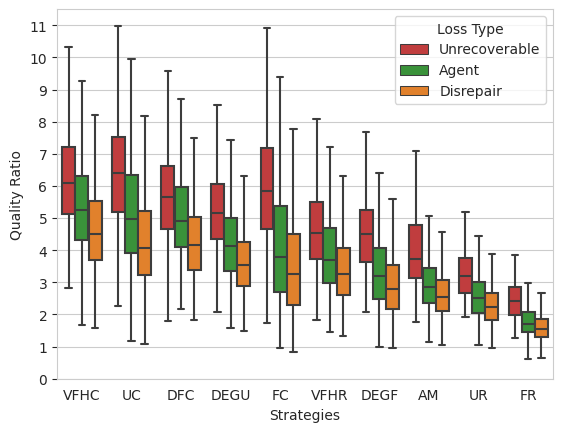

In [50]:
# Sort the x-axis data based on "Quality"
sorted_x_data = df_end_success_four.groupby("M")["Quality"].median().sort_values(ascending=False).index
fire_palette = [ "#d62728", "#2ca02c","#ff7f0e", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]

grd = sns.boxplot(
    data=df_end_success_four, 
    y="Quality", 
    hue="Loss Type", 
    x="M", 
    order=sorted_x_data,  # Specify the sorted x-axis data
    showfliers=False,
    # alpha=.8,
    palette=fire_palette,
    hue_order=['Unrecoverable','Agent', 'Disrepair', ]
)

# grd.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Loss Types')
grd.set_xticklabels(grd.get_xticklabels())
plt.yticks(range(0, 12, 1))

# rename the x axis 
grd.set(xlabel='Strategies')
grd.set(ylabel='Quality Ratio')

plt.savefig(f"distance_cost_metric.png", dpi=300, bbox_inches='tight')
plt.show()  # Optionally display the plot